In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("pune.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,PRECTOTCORR,RH2M,T2M,WD50M,WS50M_RANGE,CLRSKY_SFC_SW_DWN
0,2012,4,1,0.00,29.94,29.78,132.56,4.73,6.96
1,2012,4,2,0.00,31.00,30.58,243.00,6.72,6.81
2,2012,4,3,0.00,38.62,29.63,308.75,5.48,6.71
3,2012,4,4,0.33,47.06,29.19,308.75,5.75,6.72
4,2012,4,5,0.01,48.06,28.40,297.69,5.30,7.17
...,...,...,...,...,...,...,...,...,...
3647,2022,3,27,0.00,55.88,27.68,229.50,6.84,6.63
3648,2022,3,28,0.00,52.00,28.33,228.25,5.91,-999.00
3649,2022,3,29,0.00,39.50,28.18,306.19,6.29,6.92
3650,2022,3,30,0.00,33.81,28.12,286.69,5.25,7.02


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 3
Continuous feature Count 6
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)


YEAR                 0.0
MO                   0.0
DY                   0.0
PRECTOTCORR          0.0
RH2M                 0.0
T2M                  0.0
WD50M                0.0
WS50M_RANGE          0.0
CLRSKY_SFC_SW_DWN    0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'PRECTOTCORR', 'RH2M', 'T2M', 'WD50M', 'WS50M_RANGE', 'CLRSKY_SFC_SW_DWN']


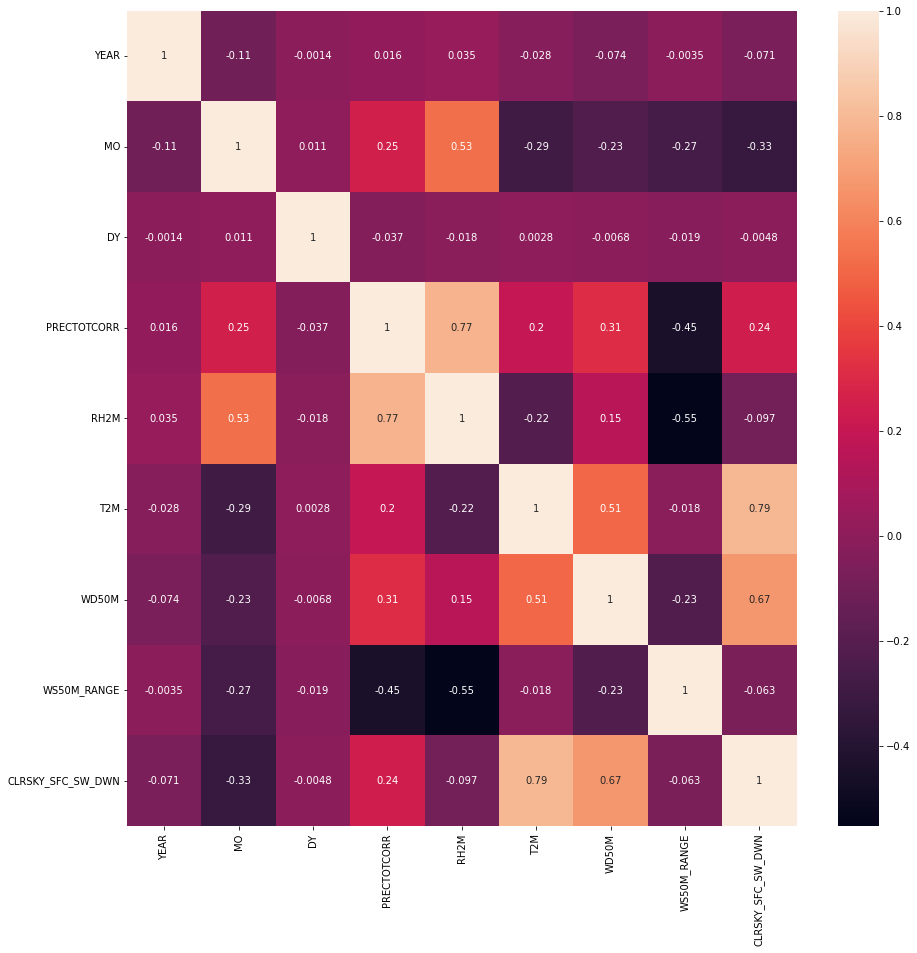

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

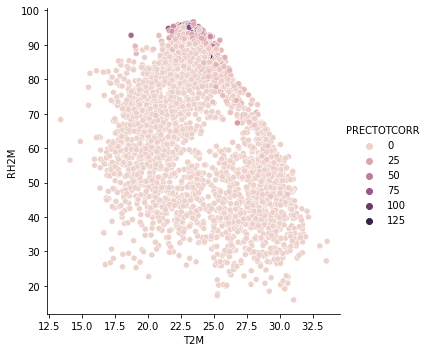

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


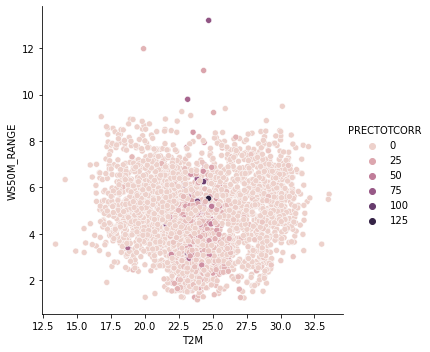

In [10]:
sns.relplot(x='T2M',y='WS50M_RANGE',hue='PRECTOTCORR',data=data)

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


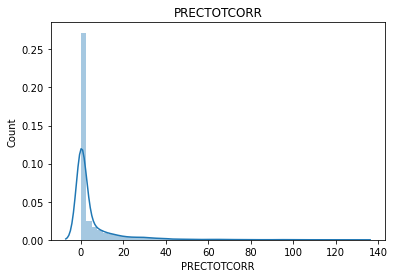

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


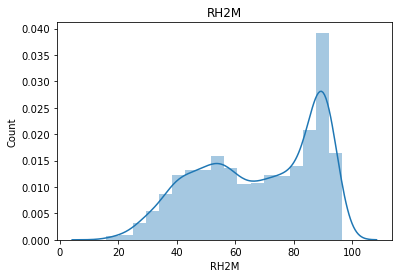

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


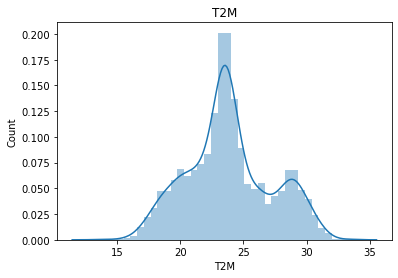

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


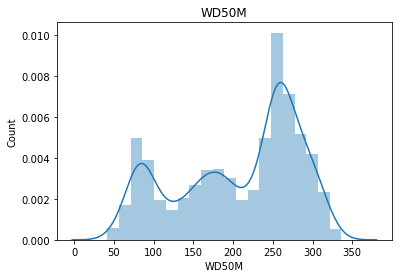

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


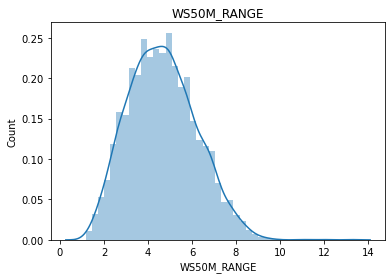

<Figure size 1080x1080 with 0 Axes>

c:\Users\ajaym\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


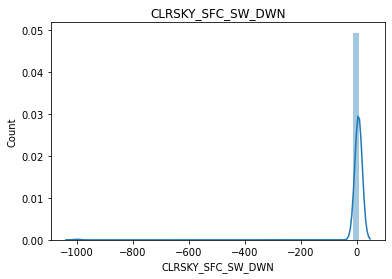

<Figure size 1080x1080 with 0 Axes>

In [11]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ajaym\anaconda\lib\site-p

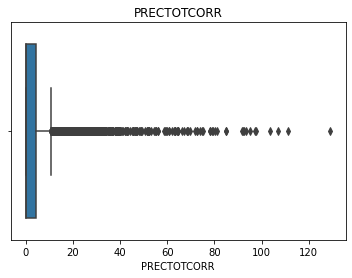

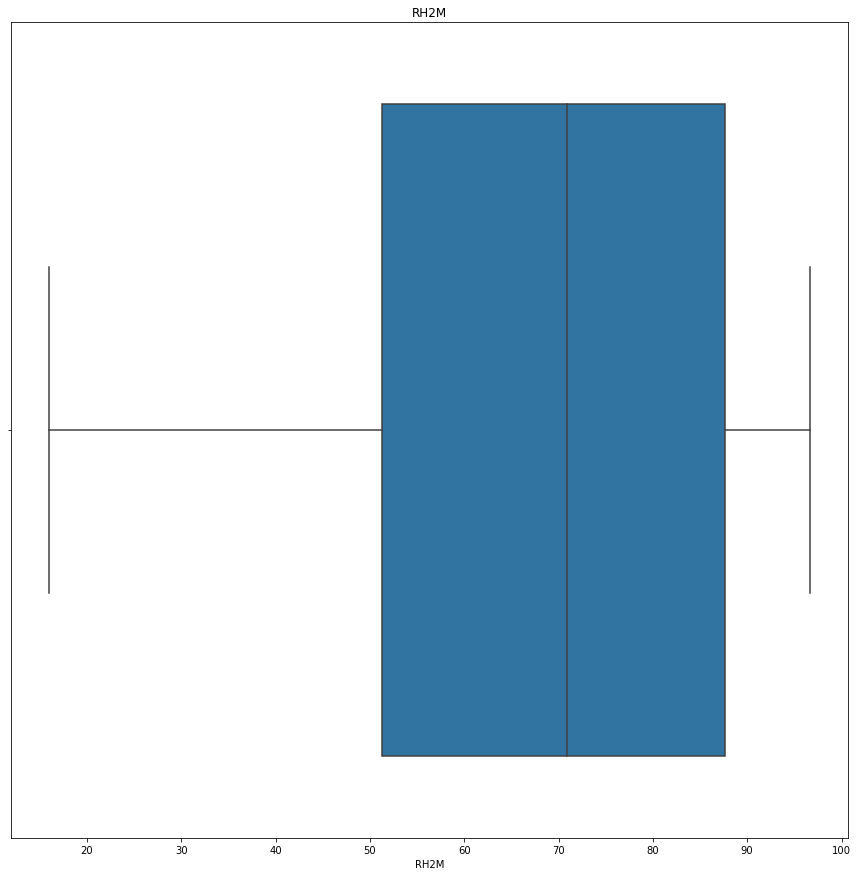

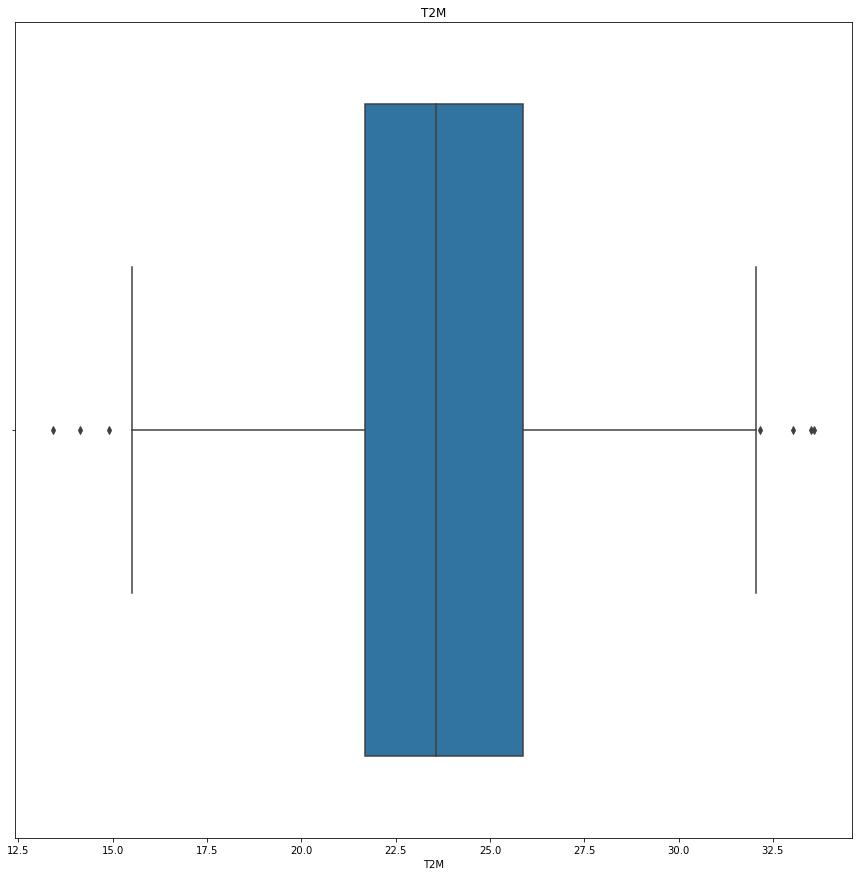

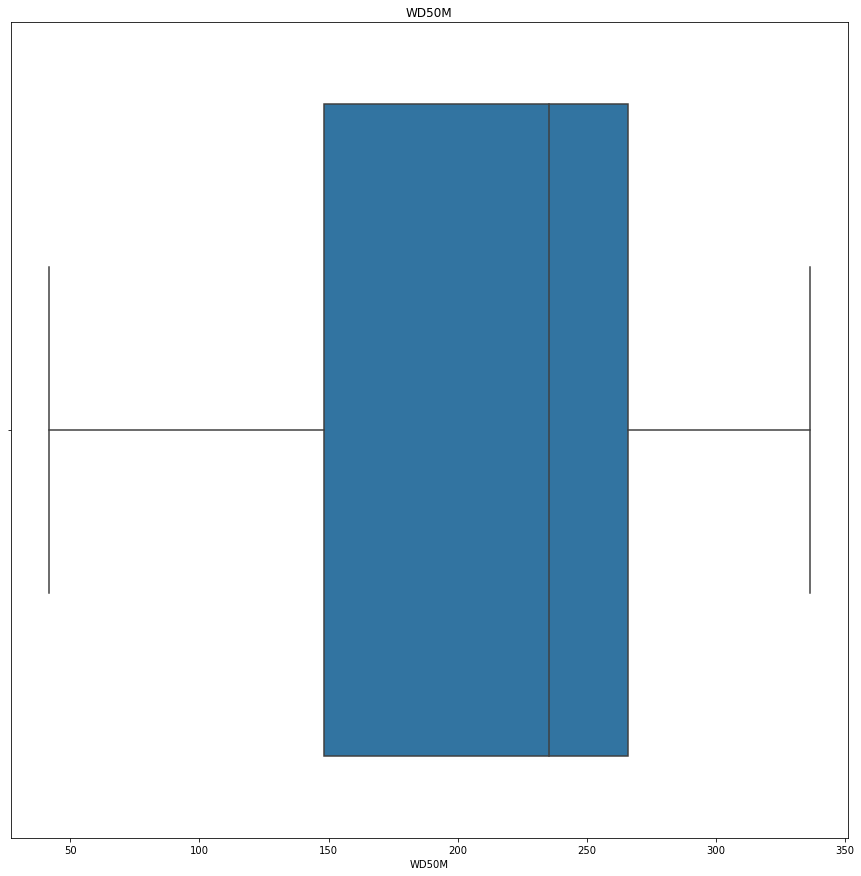

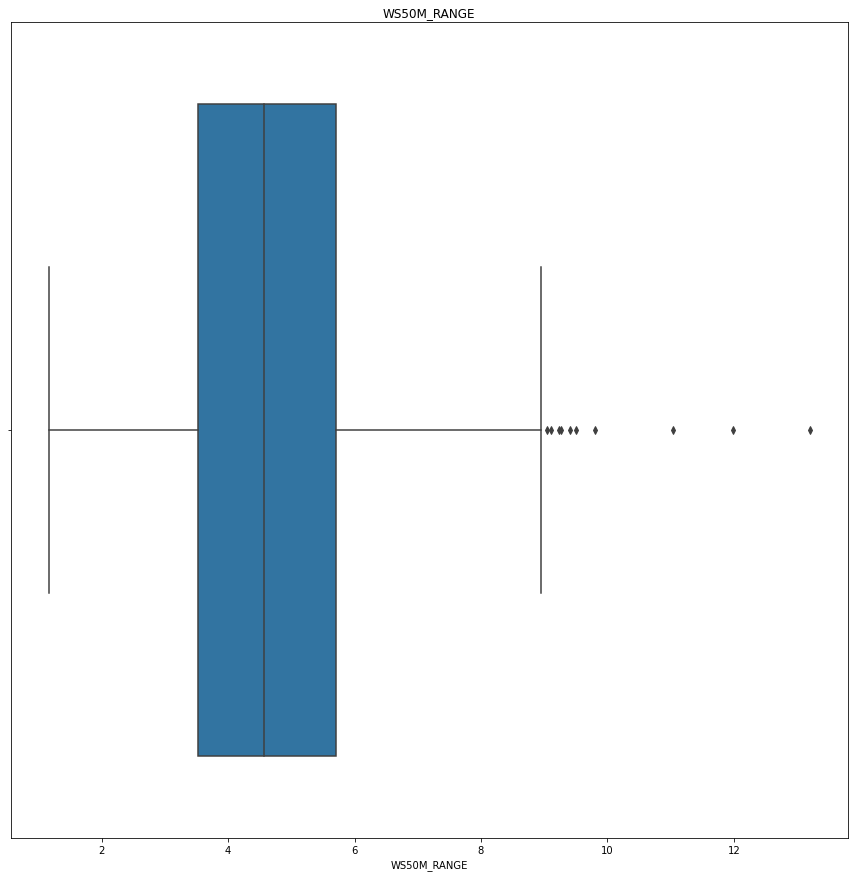

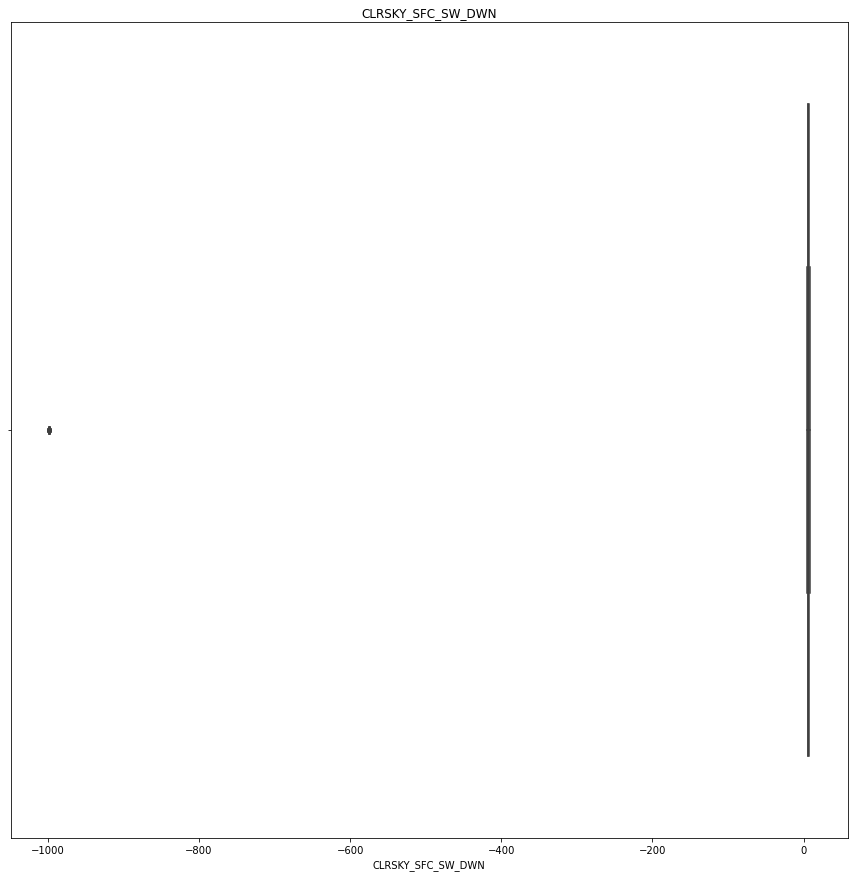

<Figure size 1080x1080 with 0 Axes>

In [12]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [13]:
d=df.copy()

In [14]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
print(d["WS50M_RANGE"].unique())
print(type(d["WS50M_RANGE"].unique()))


[29.78 30.58 29.63 ... 26.59 27.03 28.12]
<class 'numpy.ndarray'>
[0.000e+00 3.300e-01 1.000e-02 ... 1.145e+01 6.448e+01 1.403e+01]
<class 'numpy.ndarray'>
[ 4.73  6.72  5.48  5.75  5.3   4.16  7.16  6.91  6.51  5.95  5.2   6.34
  5.22  6.2   6.25  4.92  3.93  4.28  4.26  4.52  6.08  6.38  5.7   5.86
  6.35  6.13  6.81  6.09  5.44  4.85  6.83  4.77  5.08  6.23  3.34  6.22
  5.41  4.62  4.78  4.68  5.43  5.65  4.95  4.66  4.1   4.38  5.    4.44
  3.69  2.9   4.3   3.66  4.69  3.76  3.59  2.19  3.3   2.48  1.52  1.86
  2.45  2.98  3.79  3.85  2.57  3.43  3.91  4.13  3.65  3.68  8.38  3.54
  3.03  3.1   2.76  2.37  2.93  3.33  3.42  2.71  2.26  4.6   4.58  3.09
  2.77  8.19  4.84  5.66  3.78  2.55  4.45  3.17  3.29  3.12  4.05  3.5
  1.94  3.2   4.94  1.71  2.38  5.23  4.39  2.83  3.4   4.14  4.9   2.63
  2.79  5.14  3.25  2.91  3.7   4.59  4.12  4.31  4.51  3.95  5.47  5.25
  4.41  2.72  3.45  3.6   2.13  2.27  2.6   3.63  4.33  4.02  4.8   1.27
  2.06  4.34  3.52  3.53  5.06  5.16  4.53

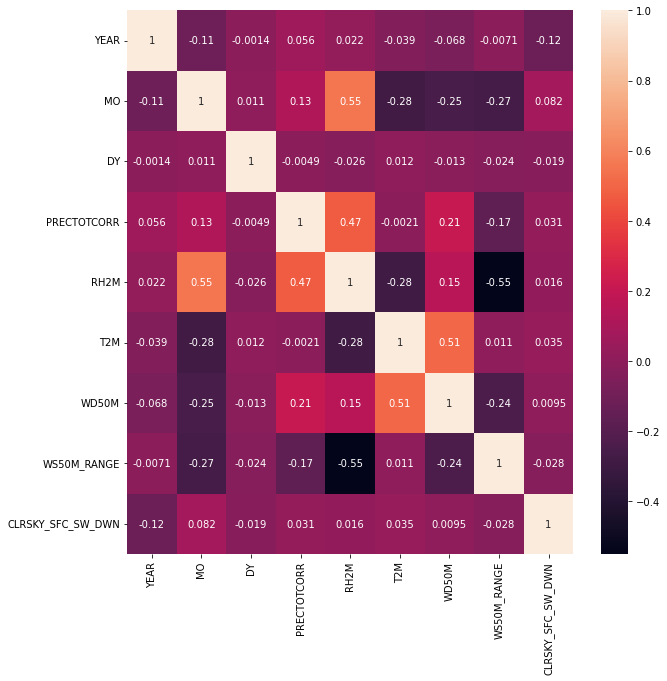

In [15]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [16]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


PRECTOTCORR


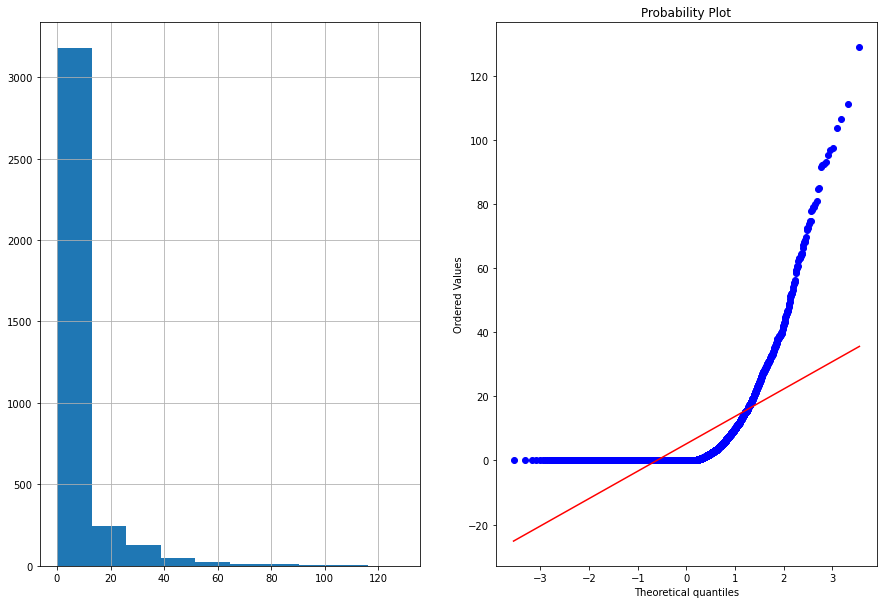

RH2M


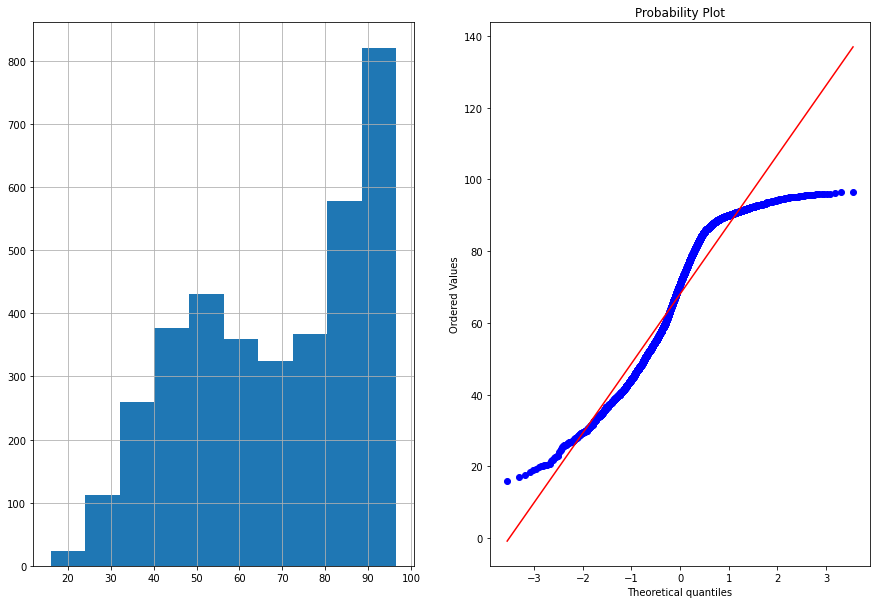

T2M


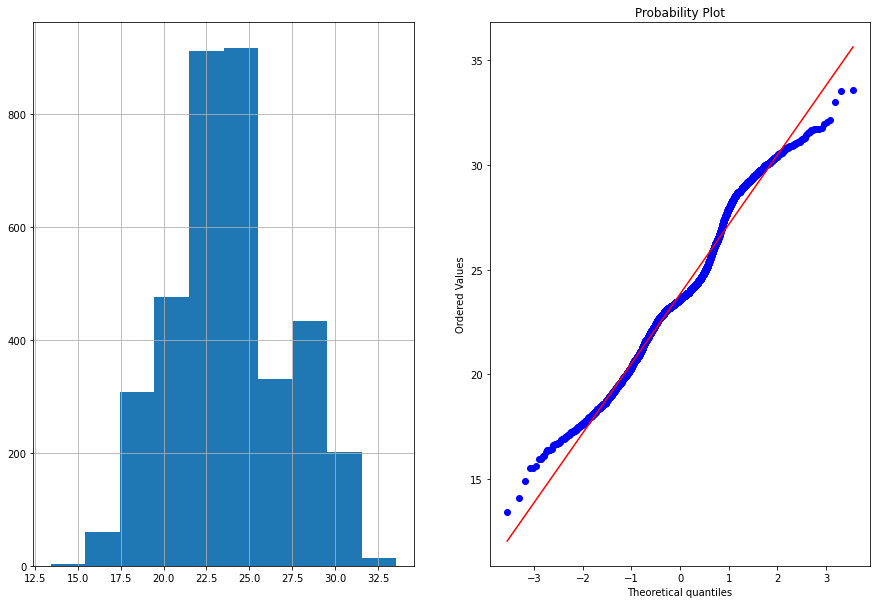

WD50M


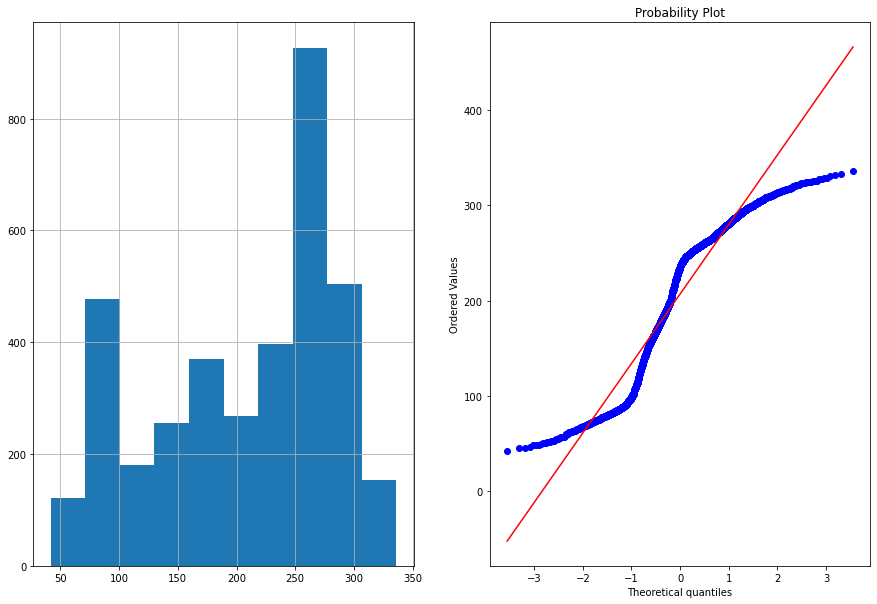

WS50M_RANGE


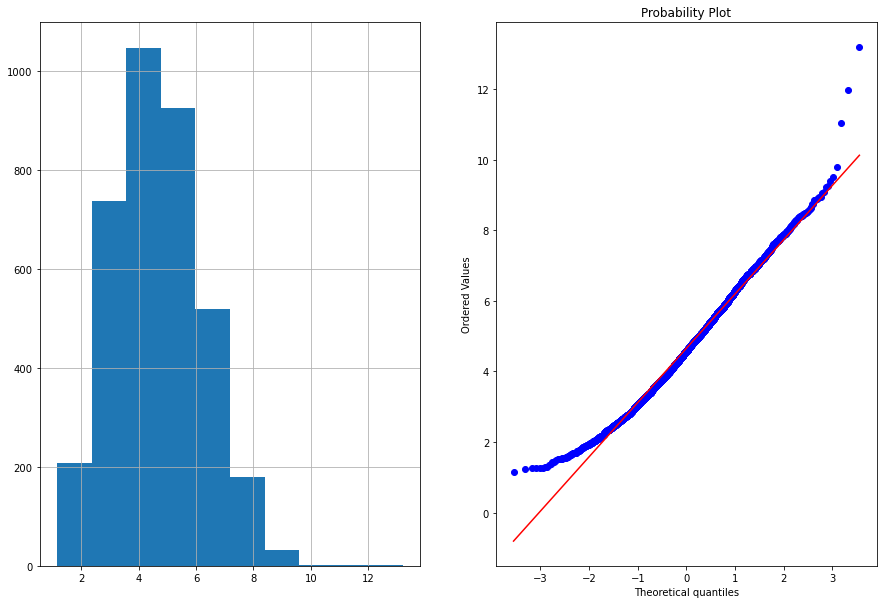

CLRSKY_SFC_SW_DWN


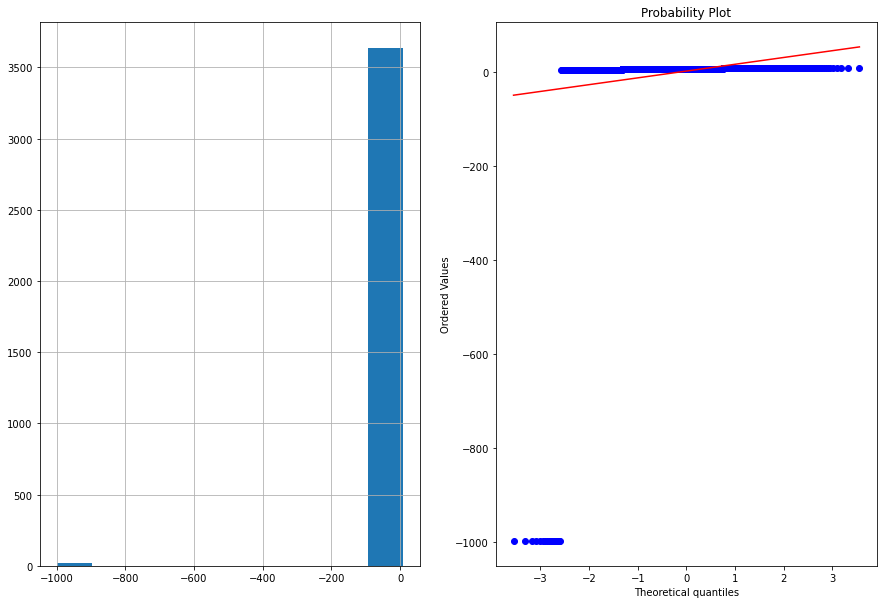

In [17]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [18]:
d.PRECTOTCORR.unique()


array([0.000e+00, 3.300e-01, 1.000e-02, ..., 1.145e+01, 6.448e+01,
       1.403e+01])

In [19]:
d1=d.copy()

In [20]:

d1=d1.PRECTOTCORR.map({0:1})

In [21]:
d2=d1.replace(np.nan, 0)

In [22]:
d2.unique()


array([1., 0.])

In [23]:
d3=d['T2M']

In [24]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,29.78,1.0
1,30.58,1.0
2,29.63,1.0
3,29.19,0.0
4,28.40,0.0
...,...,...
3647,27.68,1.0
3648,28.33,1.0
3649,28.18,1.0
3650,28.12,1.0


In [26]:
d5=d['HR'].copy()

KeyError: 'HR'

In [27]:
d

,YEAR,MO,DY,PRECTOTCORR,RH2M,T2M,WD50M,WS50M_RANGE,CLRSKY_SFC_SW_DWN
0,2012,4,1,0.00,29.94,29.78,132.56,4.73,6.96
1,2012,4,2,0.00,31.00,30.58,243.00,6.72,6.81
2,2012,4,3,0.00,38.62,29.63,308.75,5.48,6.71
3,2012,4,4,0.33,47.06,29.19,308.75,5.75,6.72
4,2012,4,5,0.01,48.06,28.40,297.69,5.30,7.17
...,...,...,...,...,...,...,...,...,...
3647,2022,3,27,0.00,55.88,27.68,229.50,6.84,6.63
3648,2022,3,28,0.00,52.00,28.33,228.25,5.91,-999.00
3649,2022,3,29,0.00,39.50,28.18,306.19,6.29,6.92
3650,2022,3,30,0.00,33.81,28.12,286.69,5.25,7.02
